# Лабораторная работа №7
## Численное решение жестких систем ОДУ

#### В работе численно решается жесткая система обыкновенных дифференциальных уравнений методом Розенброка 3 порядка
#### В качестве примера решено упражнение X.9.9 сборника Аристовой и Лобанова:
$$
	\begin{cases}
		\dot{y_1} = -Ay_1 - By_1y_3, \\
		\dot{y_2} = Ay_1 - MCy_2y_3, \\
		\dot{y_3} = Ay_1 - By_1y_3 - MCy_2y_3 + Cy_4, \\
		\dot{y_4} = By_1y_3 - Cy_4.
	\end{cases}
$$
$$A = 7.89 \cdot 10 ^ {-10}, ~~ B = 1.1 \cdot 10 ^ 7, ~~ C = 1.13 \cdot 10 ^ 3, ~~ M = 10 ^ 6$$
#### Начальные условия:
$$y_1(0) = 1.78 \cdot 10^{-3} ~~ y_2(0) = y_3(0) = y_4(0) = 0$$

#### Графики зависимости концентрации реагентов, участвующих в химической реакции E5, от времени представлены ниже.

In [62]:
import numpy as np
import matplotlib.pyplot as plt

A = 7.89 * 10 ** (-10)
B = 1.1 * 10 ** 7
C = 1.13 * 10 ** 3
M = 10 ** 6
T_k = 1000

y1_0 = 1.76 * 10 ** (-3)
y2_0 = y3_0 = y4_0 = 0

step = 0.01

def Func(y):
    func = list()
    func.append(-A * y[0] - B * y[0] * y[2])
    func.append(A * y[0] - M * C * y[1] * y[2])
    func.append(A * y[0] - B * y[0] * y[2] - M * C * y[1] * y[2] + C * y[3])
    func.append(B * y[0] * y[2] - C * y[3])
    return np.array(func)

def Jacobian(y):
    jacobian = list([])
    jacobian.append([-A - B * y[2], 0, -B * y[0], 0])
    jacobian.append([A, -M * C * y[2], -M * C * y[1], 0])
    jacobian.append([A - B * y[2], -M * C * y[2], -B * y[0] - M * C * y[1], C])
    jacobian.append([B * y[2], 0, B * y[0], -C])
    return np.array(jacobian)

In [58]:
def RozenbrokMethod(y, len_t):
    y_rozenbrok = np.array([[]]).reshape(-1, 4)
    y_rozenbrok = np.append(y_rozenbrok, [y], axis=0)

    a = 0.435866521508459
    p1 = a; p2 = 0.4782408332745185; p3 = 0.0858926452170225
    beta_21 = p1; beta_31 = p1; beta_32 = -2.116053335949811

    E = np.zeros((4, 4))
    for i in range(0, 4):
        E[i][i] = 1;

    for i in range(1, len_t):
        D = E - a * step * Jacobian(y)
        k1 = np.linalg.solve(D, step * Func(y))
        k2 = np.linalg.solve(D, step * Func(y + beta_21 * k1))
        k3 = np.linalg.solve(D, step * Func(y + beta_31 * k1 + beta_32 * k2))
        delta_y = p1 * k1 + p2 * k2 + p3 * k3
        y = y + delta_y
        y_rozenbrok = np.append(y_rozenbrok, [y], axis=0)

    return y_rozenbrok

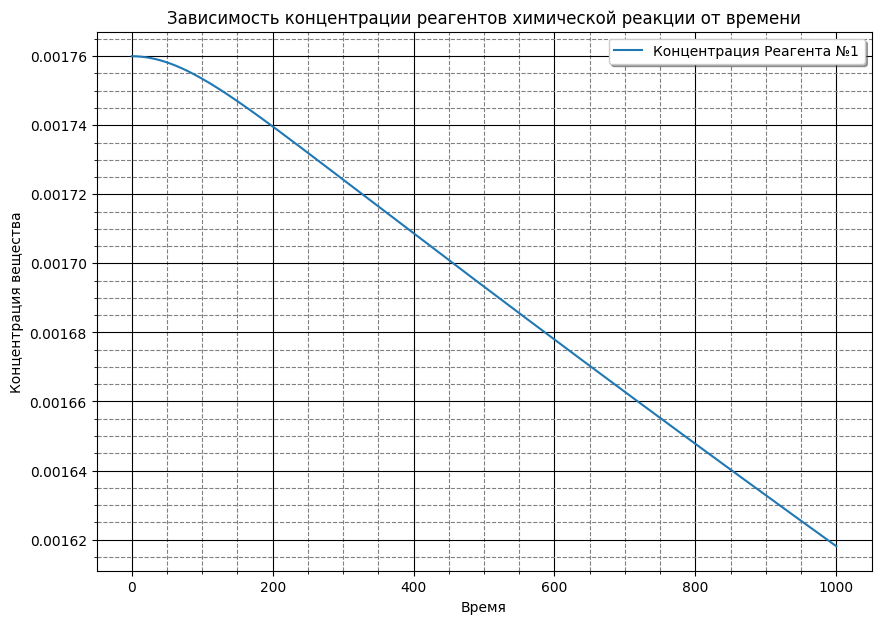

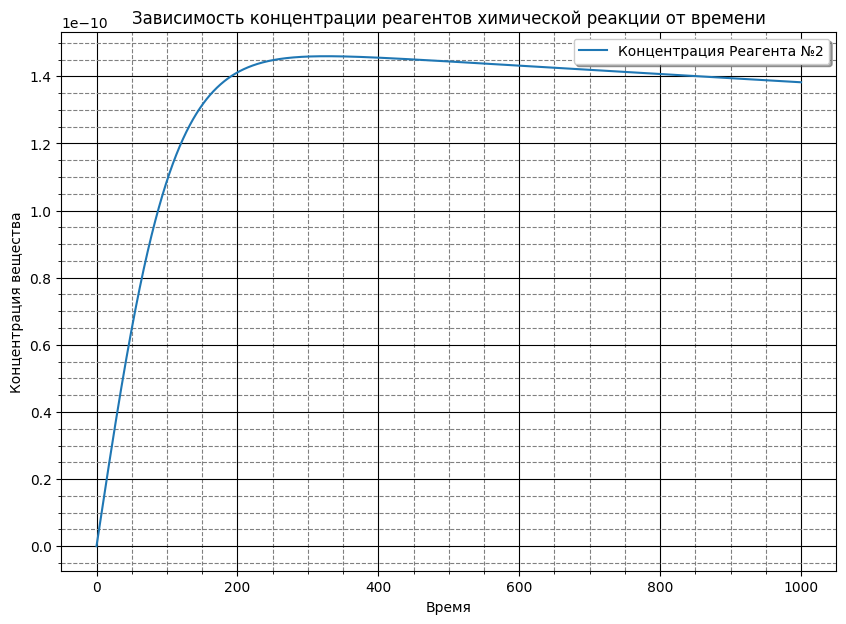

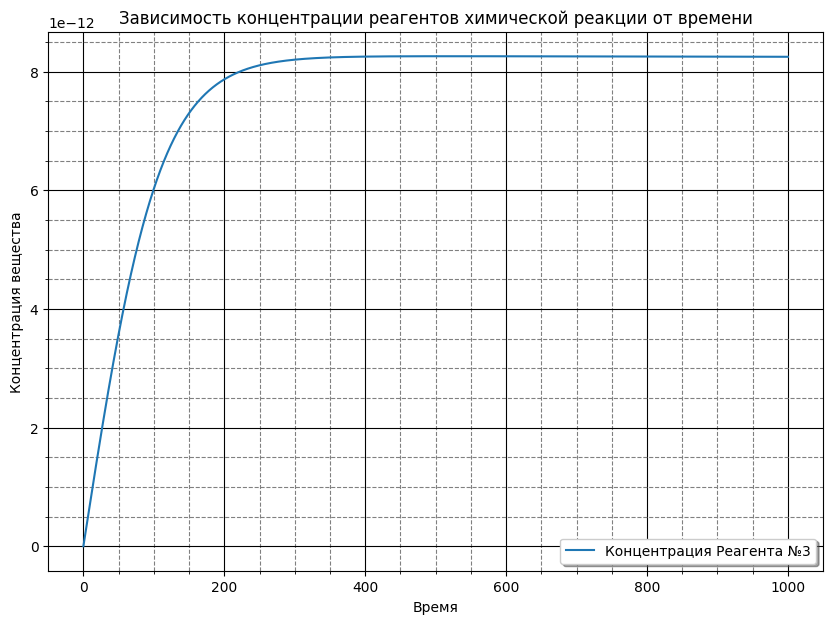

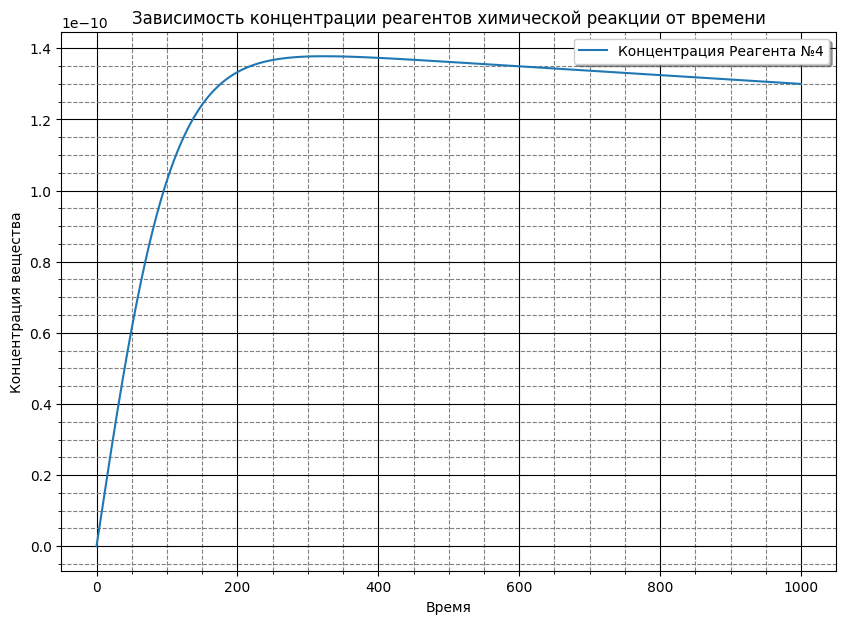

In [63]:
def PlotGraph(t, y, label):
    fig, ax = plt.subplots(figsize=[10, 7])
    ax.set_title("Зависимость концентрации реагентов химической реакции от времени")
    ax.set_xlabel("Время")
    ax.set_ylabel("Концентрация вещества")

    ax.plot(t, y, label=label)
    ax.legend(shadow=True)

    plt.minorticks_on()
    plt.grid(which='major', color='black', linestyle='-')
    plt.grid(which='minor', color='0.5', linestyle='--')

def main():
    y = np.array([y1_0, y2_0, y3_0, y4_0])
    t = np.arange(0, T_k, step)
    y_rozenbrok = RozenbrokMethod(y, len(t))
    PlotGraph(t, y_rozenbrok[:,0], "Концентрация Реагента №1")
    PlotGraph(t, y_rozenbrok[:,1], "Концентрация Реагента №2")
    PlotGraph(t, y_rozenbrok[:,2], "Концентрация Реагента №3")
    PlotGraph(t, y_rozenbrok[:,3], "Концентрация Реагента №4")

main()